**Dataset**
labeled datasset collected from twitter

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>

**Evaluation metric**
macro f1 score

> **Load the `clean data` preprocessed in `Assignment 1`, then handle it to be used with `RNNs`**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
import string
import re
import random
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)
nltk.download('wordnet')

c:\Users\EL-Huda\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[nltk_data] Downloading package wordnet to C:\Users\EL-
[nltk_data]     Huda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to C:\Users\EL-
[nltk_data]     Huda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\EL-
[nltk_data]     Huda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\EL-Huda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

### Load Dataset


In [3]:
SEED=500
random.seed(SEED)
np.random.seed(SEED)

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
df = pd.read_csv("Hate Speech.tsv", sep= "\t", index_col='id')
df.head(50)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [6]:
df.count()

label    31535
tweet    31535
dtype: int64

In [7]:
df.shape

(31535, 2)

### Spliting Data

In [8]:
X=df.drop('label',axis=1)
y=df['label']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df['tweet'],df['label'],test_size=.2,random_state=42)


In [10]:
print("Shape of X_train",X_train.shape)

print("Shape of X_test",X_test.shape)

print("Shape of y_train",y_train.shape)

print("Shape of y_test",y_test.shape)

Shape of X_train (25228,)
Shape of X_test (6307,)
Shape of y_train (25228,)
Shape of y_test (6307,)


### Preprocessing

In [11]:
print("null of X_train",X_train.isnull().sum())
print("null of y_train",y_train.isnull().sum())
print("null of X_test",X_test.isnull().sum())
print("null of y_test",y_test.isnull().sum())

null of X_train 0
null of y_train 0
null of X_test 0
null of y_test 0


In [12]:
print("null of X_train",X_train.duplicated().sum())

print("null of X_test",X_test.duplicated().sum())


null of X_train 1780
null of X_test 266


In [13]:
train_df = pd.DataFrame({'tweet': X_train, 'label': y_train})
train_df= train_df.drop_duplicates(subset=['tweet', 'label'])
X_train = train_df['tweet']
y_train= train_df['label']
print("Shape of X_train",X_train.shape)

print("Shape of y_train",y_train.shape)

Shape of X_train (23449,)
Shape of y_train (23449,)


In [14]:
test_df = pd.DataFrame({'tweet': X_test, 'label': y_test})
test_df= test_df.drop_duplicates(subset=['tweet', 'label'])
X_test = test_df['tweet']
y_test= test_df['label']
print("Shape of X_train",X_test.shape)

print("Shape of y_train",y_test.shape)

Shape of X_train (6041,)
Shape of y_train (6041,)


In [15]:
y_train.value_counts().values

array([21837,  1612], dtype=int64)

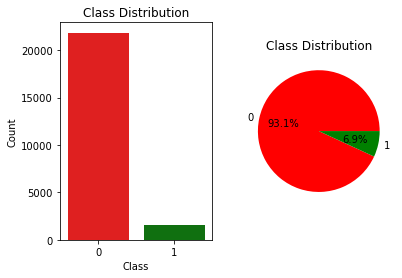

In [16]:
plt.subplot(1,2,1)
sns.barplot(x=y_train.value_counts().index,y=y_train.value_counts().values,palette=['red','green'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(y_train.value_counts().values,labels=y_train.value_counts().index,autopct='%1.1f%%',colors=['red','green'])
plt.title('Class Distribution')
plt.show()


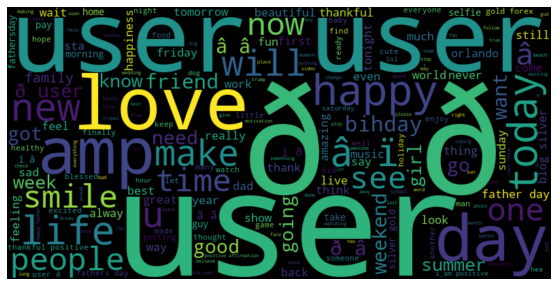

In [17]:
import wordcloud
wordcloud_instance = wordcloud.WordCloud(width=800, height=400, background_color='black')

wordcloud_instance.generate(" ".join(X_train[y_train==0]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_instance, interpolation='bilinear')
plt.axis("off")
plt.show()

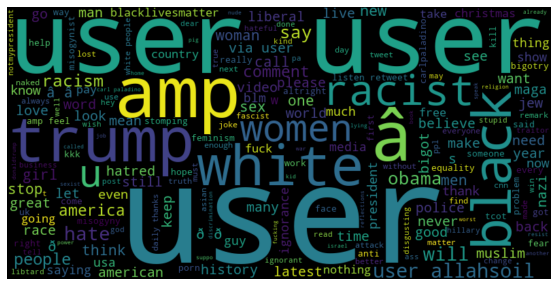

In [18]:
import wordcloud
wordcloud_instance = wordcloud.WordCloud(width=800, height=400, background_color='black')

wordcloud_instance.generate(" ".join(X_train[y_train==1]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_instance, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
max(X_train.apply(lambda x: len(x.split())))

2607

In [20]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [21]:
import re
import string
import nltk
import emoji
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin

# Ensure required NLTK resources are downloaded


class CleanTextTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column='text', return_tokens=False, join_tokens=True):
        self.text_column = text_column
        self.return_tokens = return_tokens
        self.join_tokens = join_tokens
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def fix_encoding(self, text):
        if not isinstance(text, str):
            return ""
        try:
            return text.encode('latin1').decode('utf-8')
        except Exception:
            return text

    def clean_text(self, text):
        if not isinstance(text, str):
            return ""

        text = self.fix_encoding(text)
        text = text.lower()
        text = re.sub(r'@[\w_]+', '', text)  # Remove mentions
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
        text = re.sub(r'#', '', text)  # Remove hashtag symbol
        text = emoji.demojize(text)  # Convert emojis to text
        text = re.sub(r'\d+', '', text)  # Remove numbers
        #text = contractions.fix(text)
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = re.sub(r'[^\w\s:]', '', text)  # Remove special characters except emoji colons
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        return text

    def tokenize(self, text):
        tokens = word_tokenize(text)
        tokens = [token for token in tokens if token not in self.stop_words]
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        return tokens

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # If it's a Series
        if isinstance(X, pd.Series):
            cleaned = X.apply(self.clean_text)
            tokens = cleaned.apply(self.tokenize)

            if self.return_tokens and not self.join_tokens:
                return tokens
            elif self.return_tokens and self.join_tokens:
                return tokens.apply(lambda x: ' '.join(x))
            else:
                return cleaned

        # If it's a DataFrame
        elif isinstance(X, pd.DataFrame):
            X_copy = X.copy()
            cleaned = X_copy[self.text_column].apply(self.clean_text)
            tokens = cleaned.apply(self.tokenize)

            if self.return_tokens and not self.join_tokens:
                X_copy['tokens'] = tokens
                return X_copy
            elif self.return_tokens and self.join_tokens:
                X_copy['clean_text'] = tokens.apply(lambda x: ' '.join(x))
                return X_copy
            else:
                X_copy['clean_text'] = cleaned
                return X_copy

        # If it's a list of strings
        elif isinstance(X, list):
            cleaned = [self.clean_text(text) for text in X]
            tokens = [self.tokenize(text) for text in cleaned]
            if self.return_tokens and not self.join_tokens:
                return tokens
            elif self.return_tokens and self.join_tokens:
                return [' '.join(t) for t in tokens]
            else:
                return cleaned

        else:
            raise ValueError("Input must be a pandas Series, DataFrame, or list of strings.")


In [22]:
cleaner=text_cleaner = CleanTextTransformer(text_column='tweet', return_tokens=True, join_tokens=True)
x_train_cleaned=cleaner.transform(X_train)

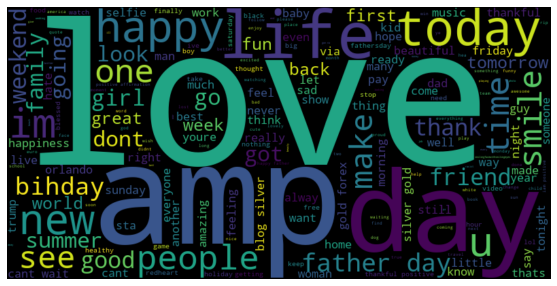

In [23]:
import wordcloud
wordcloud_instance = wordcloud.WordCloud(width=800, height=400, background_color='black')

wordcloud_instance.generate(" ".join(x_train_cleaned))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_instance, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
x_test_cleaned=cleaner.transform(X_test)

In [25]:

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train_cleaned)
word_index = tokenizer.word_index

x_train_tokenized = tokenizer.texts_to_sequences(x_train_cleaned)
x_test_tokenized = tokenizer.texts_to_sequences(x_test_cleaned)


In [26]:
from keras.preprocessing.sequence import pad_sequences
x_train_padded=pad_sequences(x_train_tokenized,maxlen=100,padding='post',truncating='post')
x_test_padded=pad_sequences(x_test_tokenized,maxlen=100,padding='post',truncating='post')


In [27]:
VOCAB_SIZE = len(word_index) + 1
print(f' VOCAB_SIZE : {VOCAB_SIZE}')

 VOCAB_SIZE : 35525


### Modelling

### RNN

In [28]:
import tensorflow as tf


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          568400    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               3136      
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [30]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=8,restore_best_weights=True)

history = model.fit(x_train_padded, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test_padded, y_test),callbacks=([early_stop]))

Epoch 1/20
733/733 [==============================] - 41s 48ms/step - loss: 0.2915 - accuracy: 0.9243 - val_loss: 0.2458 - val_accuracy: 0.9323
Epoch 2/20
733/733 [==============================] - 34s 46ms/step - loss: 0.2413 - accuracy: 0.9313 - val_loss: 0.1682 - val_accuracy: 0.9388
Epoch 3/20
733/733 [==============================] - 35s 48ms/step - loss: 0.1275 - accuracy: 0.9561 - val_loss: 0.1281 - val_accuracy: 0.9543
Epoch 4/20
733/733 [==============================] - 37s 50ms/step - loss: 0.0795 - accuracy: 0.9736 - val_loss: 0.1376 - val_accuracy: 0.9608
Epoch 5/20
733/733 [==============================] - 34s 47ms/step - loss: 0.0563 - accuracy: 0.9823 - val_loss: 0.1334 - val_accuracy: 0.9613
Epoch 6/20
733/733 [==============================] - 33s 45ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.1450 - val_accuracy: 0.9619
Epoch 7/20
733/733 [==============================] - 35s 48ms/step - loss: 0.0275 - accuracy: 0.9921 - val_loss: 0.1575 - val_accuracy:

In [31]:
model.evaluate(x_test_padded,y_test)

189/189 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.95 - 3s 14ms/step - loss: 0.1281 - accuracy: 0.9543


[0.12813979387283325, 0.9543122053146362]

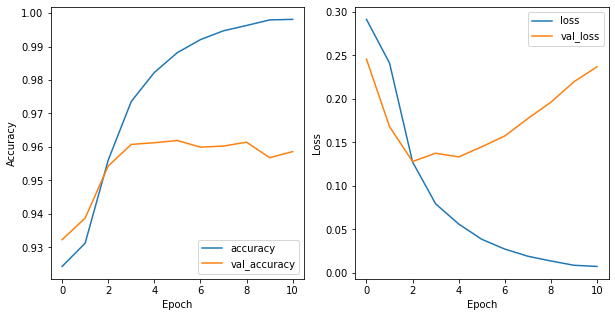

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()

In [33]:
y_pred = model.predict(x_test_padded)
y_pred = (y_pred > 0.5).astype(int)

In [34]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5632
           1       0.72      0.53      0.61       409

    accuracy                           0.95      6041
   macro avg       0.84      0.76      0.79      6041
weighted avg       0.95      0.95      0.95      6041



In [35]:
print(f'f1_score: {f1_score(y_pred,y_test,average="macro")}')

f1_score: 0.7929518109992162


### Bidirectional *RNN*

In [36]:
import tensorflow as tf
model_bi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=16, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32, return_sequences=False)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model_bi.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           568400    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               3136      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 512)               33280     
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                      

In [38]:
model_bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=8,restore_best_weights=True)

history_bi = model_bi.fit(x_train_padded, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test_padded, y_test),
                    callbacks=[early_stop])

Epoch 1/20
733/733 [==============================] - 42s 49ms/step - loss: 0.2643 - accuracy: 0.9306 - val_loss: 0.2329 - val_accuracy: 0.9323
Epoch 2/20
733/733 [==============================] - 35s 48ms/step - loss: 0.1598 - accuracy: 0.9463 - val_loss: 0.1380 - val_accuracy: 0.9502
Epoch 3/20
733/733 [==============================] - 34s 47ms/step - loss: 0.0908 - accuracy: 0.9684 - val_loss: 0.1273 - val_accuracy: 0.9581
Epoch 4/20
733/733 [==============================] - 33s 45ms/step - loss: 0.0648 - accuracy: 0.9784 - val_loss: 0.1296 - val_accuracy: 0.9609
Epoch 5/20
733/733 [==============================] - 33s 45ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.1495 - val_accuracy: 0.9624
Epoch 6/20
733/733 [==============================] - 35s 47ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.1554 - val_accuracy: 0.9613
Epoch 7/20
733/733 [==============================] - 35s 48ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.1718 - val_accuracy:

In [39]:
model_bi.evaluate(x_test_padded,y_test)

189/189 [==============================] - 3s 14ms/step - loss: 0.1273 - accuracy: 0.9581


[0.1273420751094818, 0.9581195116043091]

#### Evaluation

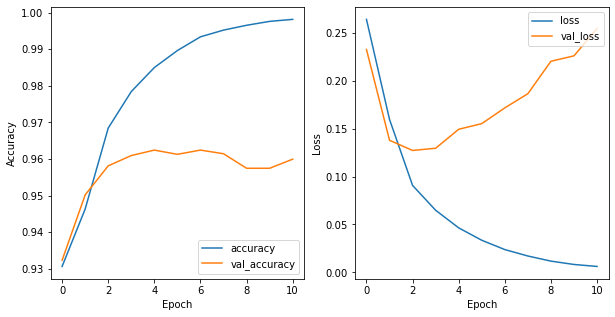

In [40]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history_bi.history['accuracy'], label='accuracy')
plt.plot(history_bi.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(history_bi.history['loss'], label='loss')
plt.plot(history_bi.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()

In [41]:
y_pred_bi = model_bi.predict(x_test_padded)
y_pred_bi = (y_pred_bi > 0.5).astype(int)

In [42]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred_bi))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5632
           1       0.74      0.59      0.66       409

    accuracy                           0.96      6041
   macro avg       0.85      0.79      0.82      6041
weighted avg       0.95      0.96      0.96      6041



In [43]:
print(f'f1_score: {f1_score(y_pred_bi,y_test,average="macro")}')

f1_score: 0.8167428353204329


### LSTM

In [44]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=64, input_length=100),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [45]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           2273600   
                                                                 
 lstm (LSTM)                 (None, 100, 64)           33024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [46]:
model_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=8,restore_best_weights=True)

history_lstm = model_lstm.fit(x_train_padded, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test_padded, y_test),
                    callbacks=[early_stop])

Epoch 1/20
733/733 [==============================] - 85s 106ms/step - loss: 0.2968 - accuracy: 0.9308 - val_loss: 0.2454 - val_accuracy: 0.9323
Epoch 2/20
733/733 [==============================] - 76s 104ms/step - loss: 0.2137 - accuracy: 0.9319 - val_loss: 0.1582 - val_accuracy: 0.9399
Epoch 3/20
733/733 [==============================] - 75s 103ms/step - loss: 0.1141 - accuracy: 0.9609 - val_loss: 0.1370 - val_accuracy: 0.9527
Epoch 4/20
733/733 [==============================] - 76s 103ms/step - loss: 0.0791 - accuracy: 0.9760 - val_loss: 0.1410 - val_accuracy: 0.9586
Epoch 5/20
733/733 [==============================] - 77s 105ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.1442 - val_accuracy: 0.9601
Epoch 6/20
733/733 [==============================] - 78s 107ms/step - loss: 0.0343 - accuracy: 0.9902 - val_loss: 0.1572 - val_accuracy: 0.9628
Epoch 7/20
733/733 [==============================] - 78s 106ms/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.1613 - val_ac

In [47]:
model_lstm.evaluate(x_test_padded,y_test)

189/189 [==============================] - 7s 35ms/step - loss: 0.1370 - accuracy: 0.9527


[0.1369808316230774, 0.9526568651199341]

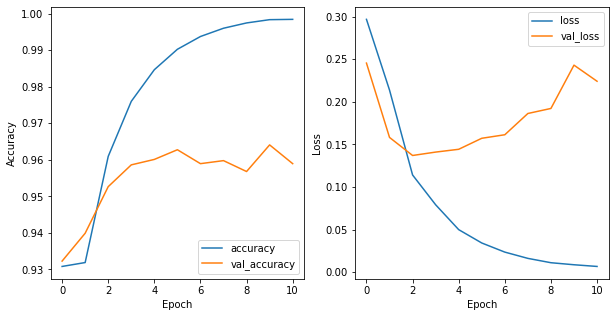

In [48]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], label='accuracy')
plt.plot(history_lstm.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(history_lstm.history['loss'], label='loss')
plt.plot(history_lstm.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()

In [49]:
y_pred_lstm = model_lstm.predict(x_test_padded)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

In [50]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5632
           1       0.67      0.59      0.63       409

    accuracy                           0.95      6041
   macro avg       0.82      0.78      0.80      6041
weighted avg       0.95      0.95      0.95      6041



In [51]:
print(f'f1_score: {f1_score(y_pred_lstm,y_test,average="macro")}')

f1_score: 0.8006789526971214


In [32]:
import tensorflow as tf

In [91]:
model_lstm_bi = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(100,)),
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # <== fix here
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    
     
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [92]:
model_lstm_bi.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 64)           2273600   
                                                                 
 bidirectional_14 (Bidirecti  (None, 100, 256)         197632    
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 100, 128)         164352    
 onal)                                                           
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_24 (Dense)            (None, 256)               33024     
                                                      

In [93]:
model_lstm_bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=8,restore_best_weights=True)

history_lstm_bi = model_lstm_bi.fit(x_train_padded, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test_padded, y_test),
                    callbacks=[early_stop])

Epoch 1/20
733/733 [==============================] - 201s 258ms/step - loss: 0.1848 - accuracy: 0.9420 - val_loss: 0.1224 - val_accuracy: 0.9578
Epoch 2/20
733/733 [==============================] - 187s 255ms/step - loss: 0.0685 - accuracy: 0.9767 - val_loss: 0.1170 - val_accuracy: 0.9641
Epoch 3/20
733/733 [==============================] - 183s 250ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.1529 - val_accuracy: 0.9636
Epoch 4/20
733/733 [==============================] - 183s 250ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.2427 - val_accuracy: 0.9626
Epoch 5/20
733/733 [==============================] - 188s 257ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.2485 - val_accuracy: 0.9548
Epoch 6/20
733/733 [==============================] - 189s 258ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.2827 - val_accuracy: 0.9599
Epoch 7/20
733/733 [==============================] - 188s 257ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.3604 -

In [94]:
model_lstm_bi.evaluate(x_test_padded,y_test)

189/189 [==============================] - 24s 127ms/step - loss: 0.1170 - accuracy: 0.9641


[0.1169777512550354, 0.9640787839889526]

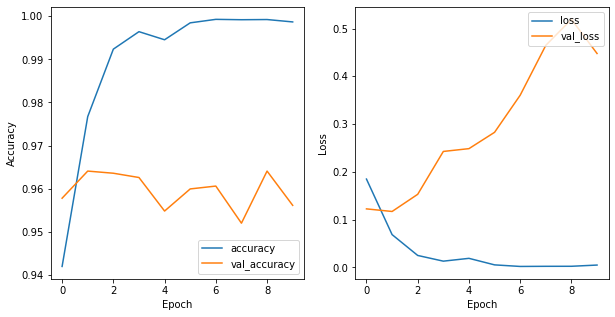

In [95]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history_lstm_bi.history['accuracy'], label='accuracy')
plt.plot(history_lstm_bi.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(history_lstm_bi.history['loss'], label='loss')
plt.plot(history_lstm_bi.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()

In [96]:
y_pred_lstm_bi = model_lstm_bi.predict(x_test_padded)
y_pred_lstm_bi = (y_pred_lstm_bi > 0.5).astype(int)

In [97]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred_lstm_bi))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5632
           1       0.80      0.63      0.70       409

    accuracy                           0.96      6041
   macro avg       0.89      0.81      0.84      6041
weighted avg       0.96      0.96      0.96      6041



In [98]:
print(f'f1_score: {f1_score(y_pred_lstm_bi,y_test,average="macro")}')

f1_score: 0.8416090354948089


---

### GRU

---

In [60]:
import tensorflow as tf
model_gru = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 16),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model_gru.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=8,restore_best_weights=True)

history_gru= model_gru.fit(x_train_padded, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test_padded, y_test),
                    callbacks=[early_stop])

Epoch 1/20
733/733 [==============================] - 37s 45ms/step - loss: 0.3231 - accuracy: 0.9272 - val_loss: 0.2477 - val_accuracy: 0.9323
Epoch 2/20
733/733 [==============================] - 35s 47ms/step - loss: 0.2579 - accuracy: 0.9313 - val_loss: 0.2481 - val_accuracy: 0.9323
Epoch 3/20
733/733 [==============================] - 33s 45ms/step - loss: 0.2572 - accuracy: 0.9313 - val_loss: 0.2487 - val_accuracy: 0.9323
Epoch 4/20
733/733 [==============================] - 35s 48ms/step - loss: 0.2562 - accuracy: 0.9313 - val_loss: 0.2481 - val_accuracy: 0.9323
Epoch 5/20
733/733 [==============================] - 33s 45ms/step - loss: 0.2555 - accuracy: 0.9313 - val_loss: 0.2477 - val_accuracy: 0.9323
Epoch 6/20
733/733 [==============================] - 35s 47ms/step - loss: 0.2559 - accuracy: 0.9313 - val_loss: 0.2479 - val_accuracy: 0.9323
Epoch 7/20
733/733 [==============================] - 33s 45ms/step - loss: 0.2554 - accuracy: 0.9313 - val_loss: 0.2482 - val_accuracy:

In [62]:
model_gru.evaluate(x_test_padded,y_test)

189/189 [==============================] - 2s 9ms/step - loss: 0.2477 - accuracy: 0.9323


[0.2476848065853119, 0.9322959780693054]

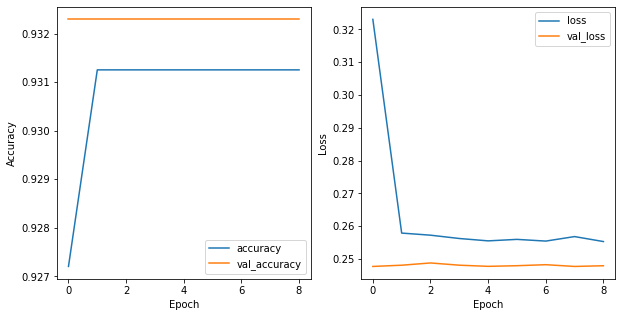

In [63]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history_gru.history['accuracy'], label='accuracy')
plt.plot(history_gru.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(history_gru.history['loss'], label='loss')
plt.plot(history_gru.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()

In [64]:
y_pred_gru = model_gru.predict(x_test_padded)
y_pred_gru= (y_pred_gru > 0.5).astype(int)

In [65]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred_gru))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5632
           1       0.00      0.00      0.00       409

    accuracy                           0.93      6041
   macro avg       0.47      0.50      0.48      6041
weighted avg       0.87      0.93      0.90      6041



c:\Users\EL-Huda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EL-Huda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EL-Huda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
import tensorflow as tf
model_gru_bi = tf.keras.models.Sequential([

    tf.keras.layers.Embedding(VOCAB_SIZE, 16),

    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dropout(0.2),

     tf.keras.layers.Dense(128, activation='relu'),

     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dropout(0.5 ),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [67]:
model_gru_bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=8,restore_best_weights=True)

history_gru_bi= model_gru_bi.fit(x_train_padded, y_train, epochs=20, batch_size=32,
                    validation_data=(x_test_padded, y_test),
                    callbacks=[early_stop])

Epoch 1/20
733/733 [==============================] - 42s 51ms/step - loss: 0.1810 - accuracy: 0.9439 - val_loss: 0.1153 - val_accuracy: 0.9596
Epoch 2/20
733/733 [==============================] - 37s 50ms/step - loss: 0.0953 - accuracy: 0.9680 - val_loss: 0.1512 - val_accuracy: 0.9618
Epoch 3/20
733/733 [==============================] - 36s 49ms/step - loss: 0.0399 - accuracy: 0.9859 - val_loss: 0.1423 - val_accuracy: 0.9623
Epoch 4/20
733/733 [==============================] - 37s 50ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.4089 - val_accuracy: 0.9613
Epoch 5/20
733/733 [==============================] - 39s 53ms/step - loss: 0.0148 - accuracy: 0.9946 - val_loss: 0.3245 - val_accuracy: 0.9333
Epoch 6/20
733/733 [==============================] - 41s 56ms/step - loss: 0.0388 - accuracy: 0.9896 - val_loss: 0.6330 - val_accuracy: 0.9205
Epoch 7/20
733/733 [==============================] - 39s 54ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.7891 - val_accuracy:

In [68]:
model_gru_bi.evaluate(x_test_padded,y_test)

189/189 [==============================] - 2s 9ms/step - loss: 0.1153 - accuracy: 0.9596


[0.11534254252910614, 0.95960932970047]

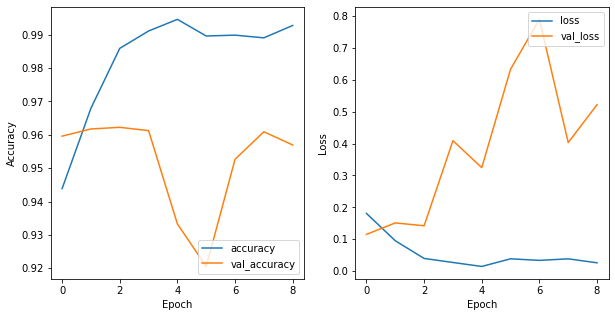

In [69]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(history_gru_bi.history['accuracy'], label='accuracy')
plt.plot(history_gru_bi.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(history_gru_bi.history['loss'], label='loss')
plt.plot(history_gru_bi.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')
plt.show()

In [70]:
y_pred_gru = model_gru_bi.predict(x_test_padded)
y_pred_gru= (y_pred_gru > 0.5).astype(int)

In [71]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred_gru))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5632
           1       0.77      0.57      0.66       409

    accuracy                           0.96      6041
   macro avg       0.87      0.78      0.82      6041
weighted avg       0.96      0.96      0.96      6041



### Enhancement

### Results & Conclusion

In [99]:
model_lstm_bi.save('model lstm bi.h5')

In [74]:
model.save('rnn mode.h5')
model_bi.save('rnn bi model.h5')
model_lstm.save('model lstm.h5')
model_lstm_bi.save('model lstm bi.h5')
model_gru.save('model gru.h5')
model_gru_bi.save('model gru bi.h5')

NameError: name 'model' is not defined

In [100]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [101]:
import tensorflow as tf
model_lstm_Final = tf.keras.models.load_model('model lstm bi.h5')

In [102]:
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [103]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def classify_custom_tweet(tweet_text):
    # Clean the tweet using your function
    cleaner_ = CleanTextTransformer(text_column='tweet', return_tokens=True, join_tokens=True)
    clean_text = cleaner_.transform([tweet_text])  # Wrap in list if your transformer expects a list

    # Convert text to sequence using your trained tokenizer
    sequence = tokenizer.texts_to_sequences(clean_text)

    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')

    # Make prediction
    prediction = model_lstm_Final.predict(padded_sequence, verbose=0)[0][0]
    sentiment = "Negative" if prediction <= 0.5 else "Positive"  # Assuming 1=Negative, 0=Positive

    return {
        "cleaned_text": clean_text,
        "probability": float(prediction),
        "sentiment": sentiment
    }


In [104]:
input = "isreal is terrorist "
result = classify_custom_tweet(input)
print(f"Original Tweet:",input)
print(f"Cleaned Version: {result['cleaned_text']}")
print(f"Predicted Sentiment: {result['sentiment']} (Confidence: {result['probability']:.4f})")

Original Tweet: isreal is terrorist 
Cleaned Version: ['isreal terrorist']
Predicted Sentiment: Negative (Confidence: 0.0769)


#### Done!

In [105]:
x_train_cleaned[y_train==0]

id
17502      big shout replaced hard used jacket warranty looking forward breaking wet coast
8515            happy monday need reason feel cry ever god fulfilled promise u awesome day
13146                                                          check star made sister team
26036                              awesome rare wildly hyped phenomenon actually life hype
9420                                       jamming new song day made hcr floatyourboat yes
                                               ...                                        
21986                                                                 wednesday daddy jack
30230               congratulation niblles forever hamster hamsterredheartboylightskintone
5515     cross check day passed next week response driving oncomingpolicecarpolicecarlight
16200                                            look door lucky work worked working worry
24075                               add close peepz staycloseofamily lt sunday gmikedre